# Python-Beispiele für RIS-API

This notebook contains some examples to show how to work with the RIS API.
Dieses Notebook beinhaltet einige Python-Beispiele, die zeigen, wie man mit der RIS-API arbeiten kann.

Inhaltsverzeichnis:

1. [Mitglieder einer Partei](#Mitglieder-einer-Partei)
1. [Gemeinderats-Geschäfte](#Gemeinderats-Geschäfte)

In [34]:
import requests
from pprint import pprint
import pandas as pd
import random

In [35]:
SSL_VERIFY = True
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.gemeinderat-zuerich.ch nicht klappt (z.B. Proxy)
# Um das SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False

In [36]:
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()

## Mitglieder einer Partei

Um alle Mitglieder einer Partei zu bekommen, müssen folgende Abfragen gemacht werden:
    
    1. ID der Partei holen
    1. Suche nach Mitgliedern der Partei (mit dieser ID)
    1. *Optional:* Detail-Informationen eines Mitglieds holen
    
    

### Alle Parameter holen

In [37]:
headers = {'Accept': 'application/json'}
r = requests.get('https://www.gemeinderat-zuerich.ch/api/Mitglieder/parameter', headers=headers, verify=SSL_VERIFY)
params = r.json()

In [38]:
# get id of random party
parties = params['Parteien']
party = random.choice(parties)
party

{'Name': 'Grüne', 'Id': 'fe956d66-e14d-4739-82cf-c12202d96445'}

### Mitglieder der Partei abfragen

In [39]:
query = {'parteiId': party['Id']}
headers = {'Accept': 'application/json'}
r = requests.get('https://www.gemeinderat-zuerich.ch/api/Mitglieder/suchen', params=query, headers=headers, verify=SSL_VERIFY)
members = r.json()
members

[{'Id': '8eb28350-c0cb-42db-b4bd-b753fd38ff7b',
  'Name': 'Bätschmann',
  'Vorname': 'Monika',
  'Titel': None,
  'Partei': 'Grüne',
  'Wahlkreis': '10',
  'WahlkreisOrderBy': 106},
 {'Id': '0a2595e4-f04c-4b05-910e-4f7b37161eda',
  'Name': 'Bührig',
  'Vorname': 'Marcel',
  'Titel': None,
  'Partei': 'Grüne',
  'Wahlkreis': '10',
  'WahlkreisOrderBy': 106},
 {'Id': '519973d2-b738-4664-b746-f0f4cb815497',
  'Name': 'Bürgisser',
  'Vorname': 'Balz',
  'Titel': 'Dr.',
  'Partei': 'Grüne',
  'Wahlkreis': '7 und 8',
  'WahlkreisOrderBy': 104},
 {'Id': '9f155c63-f755-4bbd-b1b8-dd8e7ad4421e',
  'Name': 'Fürer',
  'Vorname': 'Brigitte',
  'Titel': None,
  'Partei': 'Grüne',
  'Wahlkreis': '4 und 5',
  'WahlkreisOrderBy': 102},
 {'Id': 'ceb880c2-db62-491a-9f62-883bb8e72a81',
  'Name': 'Kälin-Werth',
  'Vorname': 'Simon',
  'Titel': None,
  'Partei': 'Grüne',
  'Wahlkreis': '7 und 8',
  'WahlkreisOrderBy': 104},
 {'Id': 'b8b3c9f7-2f9b-4247-95f7-af7eb177940f',
  'Name': 'Kisker',
  'Vorname': 'Ga

### Details der Mitglieder abfragen

Mit dem `/Mitglieder/details` Endpunkt können Details eines Mitglieds abgefragt werden:

In [40]:
def get_member_details(member):
    query = {'mid': member['Id']}
    headers = {'Accept': 'application/json'}
    r = requests.get('https://www.gemeinderat-zuerich.ch/api/Mitglieder/details', params=query, headers=headers, verify=SSL_VERIFY)
    details = r.json()
    # trim "Wahlkreis" and "Wohnkreis" since they have a padding
    details['Wahlkreis'] = details['Wahlkreis'].strip()
    if details['Wohnkreis']:
        details['Wohnkreis'] = details['Wohnkreis'].strip()
    # add original member to keep WahlkreisOrderBy column
    details.update(member)
    return details
    
member_details = [get_member_details(m) for m in members]
df = pd.DataFrame(member_details)
df

,Adressen,Anrede,Beruf,EmailGeschaeftlich,EmailPrivat,Fraktion,Geburtstag,GruppenMitgliedschaften,Id,Interessenverbindungen,...,NameInUrl,Partei,Sitznummer,TelefonGeschaeftlich,TelefonPrivat,Titel,Vorname,Wahlkreis,WahlkreisOrderBy,Wohnkreis
0,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Frau,Dipl. Sozialarbeiterin,None,m.baetschmann@gmx.ch,Grüne,1954-09-11T00:00:00,"[{'Von': '1993-05-12T00:00:00', 'Bis': '1998-0...",8eb28350-c0cb-42db-b4bd-b753fd38ff7b,,...,Monika%20B%c3%a4tschmann,Grüne,None,,,None,Monika,10,106,10
1,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Herr,"Frontend Engineer, Applikationsentwickler EFZ",,marcel@buehrig.me,Grüne,1994-03-24T00:00:00,"[{'Von': '2014-05-07T00:00:00', 'Bis': None, '...",0a2595e4-f04c-4b05-910e-4f7b37161eda,"- second@s plus Zürich, Vorstandsmitglied\r- P...",...,Marcel%20B%c3%bchrig,Grüne,None,None,None,None,Marcel,10,106,1
2,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Herr,Mittelschullehrer,,balz.buergisser@hispeed.ch,Grüne,1953-06-15T00:00:00,"[{'Von': '2017-01-01T00:00:00', 'Bis': None, '...",519973d2-b738-4664-b746-f0f4cb815497,"- Quartierverein Witikon, Präsident",...,Balz%20B%c3%bcrgisser,Grüne,None,,044 381 35 65,Dr.,Balz,7 und 8,104,7
3,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Frau,Raumplanerin / Landschaftsarchitektin,,bfuerer@gmx.ch,Grüne,1964-12-30T00:00:00,"[{'Von': '2018-05-16T00:00:00', 'Bis': None, '...",9f155c63-f755-4bbd-b1b8-dd8e7ad4421e,"- VCS Zürich, Vorstand",...,Brigitte%20F%c3%bcrer,Grüne,None,052 724 53 24,,None,Brigitte,4 und 5,102,4
4,"[{'Addressart': 'Postadresse', 'Strasse1': 'Do...",Herr,Dipl. Natw. ETH Umweltphysiker,,simka@bluewin.ch,Grüne,1964-12-12T00:00:00,"[{'Von': '2009-02-09T00:00:00', 'Bis': None, '...",ceb880c2-db62-491a-9f62-883bb8e72a81,"- Natur– und Vogelschutzverein Meise Zürich 2,...",...,Simon%20K%c3%a4lin-Werth,Grüne,None,044 202 79 76,044 482 53 19,None,Simon,7 und 8,104,2
5,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Frau,dipl. Architektin ETH,None,gabriele@kisker.ch,Grüne,1961-03-05T00:00:00,"[{'Von': '2006-05-03T00:00:00', 'Bis': None, '...",b8b3c9f7-2f9b-4247-95f7-af7eb177940f,"- Kirchenpflege St. Peter, Zürich, Kirchenguts...",...,Gabriele%20Kisker,Grüne,None,None,044 221 12 54,None,Gabriele,1 und 2,100,1
6,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Herr,"lic. phil. I, Geschäftsführer VCS Zürich",,markus.knauss@swissonline.ch,Grüne,1961-07-27T00:00:00,"[{'Von': '1998-04-08T00:00:00', 'Bis': None, '...",fdc2ec44-f507-42b8-8b0a-d8b0082990c2,"- Verkehrs-Club der Schweiz (VCS), Bern, Deleg...",...,Markus%20Knauss,Grüne,None,044 291 33 00,044 451 19 23,None,Markus,4 und 5,102,3
7,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Herr,Fachhochschullehrer,markus.kunz@zhaw.ch,,Grüne,1959-12-29T00:00:00,"[{'Von': '2012-05-09T00:00:00', 'Bis': None, '...",56d4d8c4-0ee8-4dce-b0b8-dc2388433758,,...,Markus%20Kunz,Grüne,None,058 934 75 35,044 312 00 91,None,Markus,3,101,7
8,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Herr,Sozialarbeiter,muammer.kurtulmus@zuerich.ch,muammer_kurtulmus@hotmail.com,Grüne,1964-09-14T00:00:00,"[{'Von': '2015-10-16T00:00:00', 'Bis': None, '...",e381099f-c2cf-4df3-ac06-a84daa094132,None,...,Muammer%20Kurtulmus,Grüne,None,044 412 64 10,044 558 32 66,None,Muammer,3,101,3
9,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Herr,Juristischer Mitarbeiter,,luca.maggi@gmx.ch,Grüne,1990-08-28T00:00:00,"[{'Von': '2018-05-16T00:00:00', 'Bis': None, '...",7d0fb669-0e85-4051-87f5-db23ea3f1802,"- 1.-Mai-Komitee, Vorstandsmitglied",...,Luca%20Maggi,Grüne,None,None,,None,Luca,1 und 2,100,4


### Diagramm aller Mitglieder einer Partei nach Wahlkreis

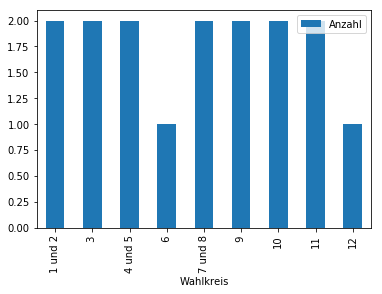

In [41]:
count_by_wahlkreis = df[['Wahlkreis', 'WahlkreisOrderBy']].groupby(['Wahlkreis', 'WahlkreisOrderBy']).size().reset_index(name='Anzahl')
count_by_wahlkreis = count_by_wahlkreis.sort_values(by=['WahlkreisOrderBy'])
count_by_wahlkreis.plot.bar(x='Wahlkreis', y='Anzahl')

## Gemeinderats-Geschäfte

* Welches Mitglied des Gemeinderats hat welche Geschäte eingebracht?
* Welchen Status haben diese Geschäfte?

### Mitglied des Gemeinderats abfragen

In [42]:
headers = {'Accept': 'application/json'}
r = requests.get('https://www.gemeinderat-zuerich.ch/api/Mitglieder', headers=headers, verify=SSL_VERIFY)
members = r.json()
member = random.choice(members)
member

{'Id': '04e3e929-da92-434e-9f6c-ab7cd0a1a3e7',
 'Name': 'Anken',
 'Vorname': 'Walter',
 'Titel': None,
 'Partei': 'SVP',
 'Wahlkreis': ' 6',
 'WahlkreisOrderBy': 103}

### Geschäfte eines Mitglieds abfragen

In [43]:
query = {'personId': member['Id']}
headers = {'Accept': 'application/json'}
r = requests.get('https://www.gemeinderat-zuerich.ch/api/Geschaeft', params=query, headers=headers, verify=SSL_VERIFY)
result = r.json()
deals = pd.DataFrame(result['Geschaefte'])
deals

,GeschaeftId,Geschaeftsart,Geschaeftsjahr,Geschaeftsnummer,Geschaeftstitel
0,20585411-32de-4e5e-aab2-a67d1a614df0,Schriftliche Anfrage,2019,112,Strafrechtliche Ermittlungen gegen eine Mitarb...
1,33e808bf-0020-4884-8d99-4b60b0e86111,Postulat,2018,482,Prüfung einer Miete von nahen Gebäuden als Sch...
2,fa811327-1912-4f9a-8742-c81ec8553f5f,Schriftliche Anfrage,2018,417,"Sozialpädagogische Familienbegleitungen, Entwi..."
3,8cffc9a9-e924-48eb-879b-8c9ad7d70e47,Postulat,2018,300,Detailliertere Auskünfte über die Klientinnen ...
4,2e6b4c3a-086d-4259-9dfb-1a68d010570b,Schriftliche Anfrage,2018,243,Anfechtung der Kündigungen von Mietverträgen v...
5,7ef48aa1-618e-4a62-8ca8-27a86c27265c,Schriftliche Anfrage,2018,113,Unbewilligte Demonstrationen im Zusammenhang m...
6,7e991768-fd33-4612-b90e-2baa7c0eb499,Postulat,2017,458,Einschränkung des Suchverkehrs in der «Blauen ...
7,b48789dc-d6cd-409d-9895-a5e29d23b9f6,Postulat,2017,394,"Kürzung der Sozialleistungen für Flüchtlinge, ..."
8,a858faac-2bf2-4dee-b6a6-b38e4dc1c333,Postulat,2017,386,Kürzung der Sozialhilfe für militante Islamist...
9,3ff7c844-84f2-40d9-a8fd-dbe5e084fbf1,Postulat,2017,325,Verhinderung von nicht bewilligten Demonstrati...


In [44]:
deals_by_ga = deals[['Geschaeftsart']].groupby(['Geschaeftsart']).size().reset_index(name='Anzahl')
deals_by_ga

,Geschaeftsart,Anzahl
0,Postulat,6
1,Schriftliche Anfrage,4


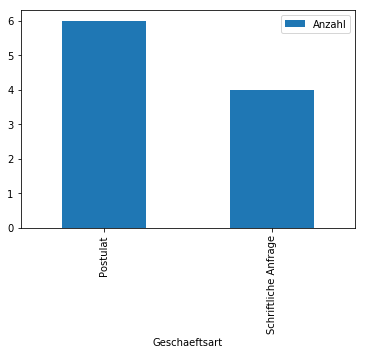

In [45]:
deals_by_ga.plot.bar(x='Geschaeftsart', y='Anzahl')